# Notebook for Fourier Transform 2D

In [182]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

### Step One
we will load 3 pictures and show them in gray's scales

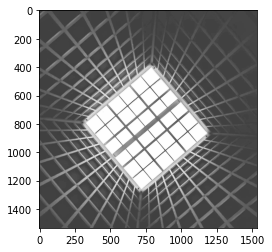

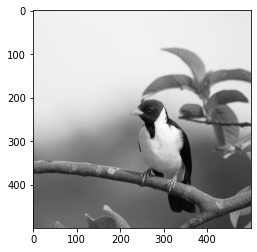

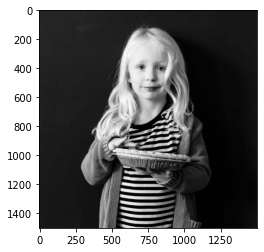

In [183]:
images = [
    np.asarray(Image.open("./im1.webp")),
    np.asarray(Image.open("./im2.jpeg")),
    np.asarray(Image.open("./im3.jpg"))
]
images = [np.round(0.299*im[:, :, 0]+0.587 * im[:, :, 1]+0.114*im[:, :, 2]).astype(np.uint8) for im in images]

for image in images:
    plt.imshow(255-image,cmap='Grays')
    plt.show()

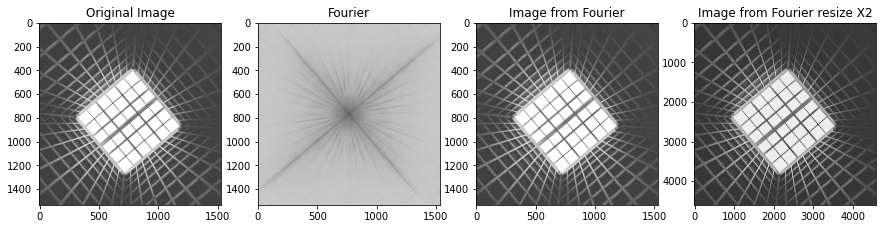

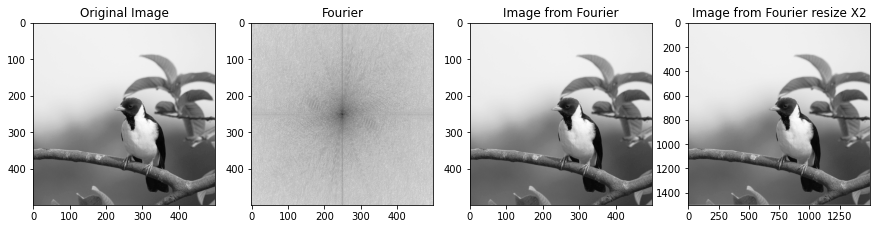

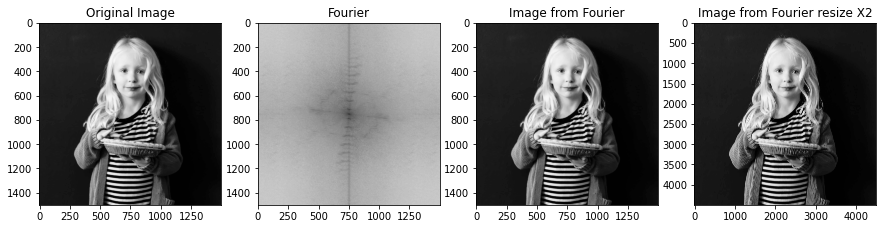

In [184]:
for image in images:
    figure, axis = plt.subplots(1,4)
    figure.set_figwidth(15)
    figure.set_figheight(5)
    axis[0].imshow(255-image,cmap='Grays')
    axis[0].set_title("Original Image")
    fimage = np.fft.fftshift(np.fft.fft2(image))
    axis[1].imshow(np.log(np.abs(fimage)),cmap='Grays')
    axis[1].set_title("Fourier")
    axis[2].imshow(255-np.abs(np.fft.ifft2(fimage)),cmap='Grays')
    axis[2].set_title("Image from Fourier")
    axis[3].imshow(255-np.abs(np.fft.ifft2(np.pad(fimage,fimage.shape[0]))),cmap='Grays')
    axis[3].set_title("Image from Fourier resize X2")
    plt.show()

### Idel Low-Pass Filter
1.first we will calculate the DFT of the images <br>
2. multiply each cell with the cutoff filter 
3. revert the image from the Fourier

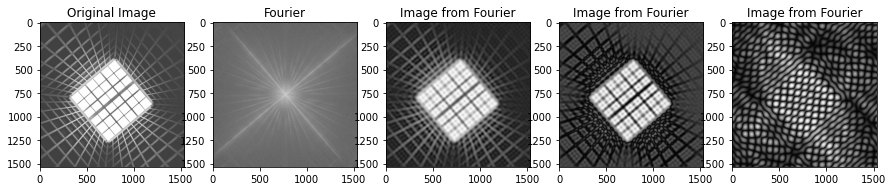

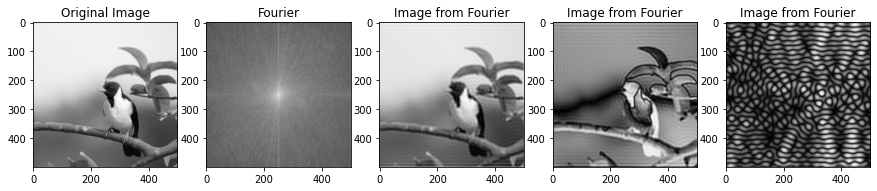

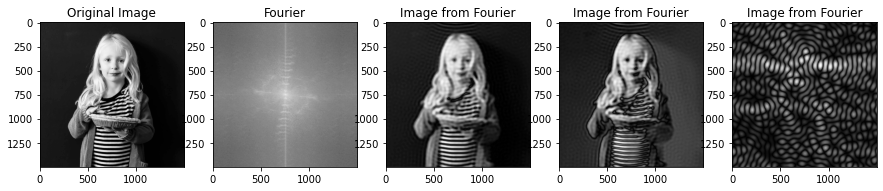

In [185]:
def ILP(image,alpha=10):
    filter = image
    I,J=np.meshgrid(np.arange(filter.shape[0]),np.arange(filter.shape[1]))
    I,J
    dist=np.sqrt((I-filter.shape[0]//2)**2+(J-filter.shape[0]//2)**2)
    filter[np.where(dist >= alpha)]*=0
    return filter

def IHP(image,alpha=10):
    filter = image
    I,J=np.meshgrid(np.arange(filter.shape[0]),np.arange(filter.shape[1]))
    I,J
    dist=np.sqrt((I-filter.shape[0]//2)**2+(J-filter.shape[0]//2)**2)
    filter[np.where(dist < alpha)]*=0
    return filter

def IBP(image,alpha=10):
    filter = image
    I,J=np.meshgrid(np.arange(filter.shape[0]),np.arange(filter.shape[1]))
    I,J
    dist=np.sqrt((I-filter.shape[0]//2)**2+(J-filter.shape[0]//2)**2)
    filter[np.where(dist > alpha+1)]*=0
    filter[np.where(dist < alpha)]*=0
    return filter    

for image in images:
    figure, axis = plt.subplots(1,5)
    figure.set_figwidth(15)
    figure.set_figheight(5)
    axis[0].imshow(255-image,cmap='Grays')
    axis[0].set_title("Original Image")
    fimage = np.fft.fftshift(np.fft.fft2(image))
    axis[1].imshow(255-np.log(np.abs(fimage)),cmap='Grays')
    axis[1].set_title("Fourier")
    axis[2].imshow(255-np.abs(np.fft.ifft2(ILP(fimage,40))),cmap='Grays')
    axis[2].set_title("Image from Fourier")
    axis[3].imshow(255-np.abs(np.fft.ifft2(IHP(fimage,1))),cmap='Grays')
    axis[3].set_title("Image from Fourier")
    axis[4].imshow(255-np.abs(np.fft.ifft2(IBP(fimage,15))),cmap='Grays')
    axis[4].set_title("Image from Fourier")
    plt.show()

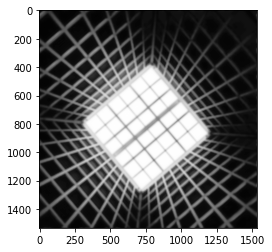

In [199]:
def Gaussian(image,alpha=100):
    filter = image
    I,J=np.meshgrid(np.arange(filter.shape[0]),np.arange(filter.shape[1]))
    I,J
    dist=np.sqrt((I-filter.shape[0]//2)**2+(J-filter.shape[0]//2)**2)
    filter*= 1-dist/alpha
    filter[np.where(dist > alpha)]*=0
    return filter 
x = images[0]
fimage = np.fft.fftshift(np.fft.fft2(x))
plt.imshow(255-np.log(np.abs(np.fft.ifft2(Gaussian(fimage))+1)),cmap='Grays')
plt.show()